In [4]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import time
import os
from IPython.core.debugger import set_trace

In [6]:
#imgList = pd.read_csv("../input/train_ext.csv")
imgList = pd.read_csv("../input/sample_submission.csv")
len(imgList)

11702

In [1]:
DIR_in = "../input/test/"
DIR_out = "/kaggle_data/human_protein/test_png4/"
EXT = False

In [7]:
from IPython.core.debugger import set_trace
def merge_rgby_files(DIR_in, DIR_out, Id, EXT=True): #a function that reads RGBY image
    colors = ['red','green','blue','yellow']
    color_map = {'red':2, 'green':1, 'blue':0, 'yellow':1} # EXT Data, yellow = green + red = green only setting
    flags = cv2.IMREAD_GRAYSCALE
    #set_trace()
    try:
        if EXT:
            img = np.stack([cv2.imread(DIR_in + Id + '_'+ color + '.png')[:,:,color_map[color]] for color in colors], axis=-1)
        else:
            img = np.stack([cv2.imread(DIR_in + Id + '_'+ color + '.png', flags) for color in colors], axis=-1)
        cv2.imwrite(DIR_out + Id + '.png', img)  
    except:
        set_trace()
        print('exception occurs')
        print(DIR_in,Id,color)
   #return img#np.stack(img, axis=-1)

In [8]:
# %%time
offset = 11072
length = 11702+1-11072
for idx,i in enumerate(imgList['Id'][offset:offset+length]):
    if idx%1000==0:
        print(idx+offset)
#    print(idx+offset, i)
    merge_rgby_files(DIR_in,DIR_out, i ,EXT=EXT)
print(offset,offset+length)

11072
11072 11703


Check integrity of saved PNG file by reading back 1st three channels

In [ ]:
for i in range(10):
    im = cv2.imread(DIR_out+imgList['Id'][i+offset]+'.png', cv2.IMREAD_UNCHANGED)
    plt.imshow(im[:,:,:3])
    plt.show()

In [ ]:
imgList1 = '35079_383_H5_4'
im = cv2.imread(DIR_in+imgList1+'_green'+'.png')
im.shape

In [ ]:
imgList1 = '35079_383_H5_4'
merge_rgby_files(DIR_in,DIR_out, imgList1 ,EXT=EXT)
im = cv2.imread(DIR_out+imgList1+'.png', cv2.IMREAD_UNCHANGED).astype(np.float32)/255
A = np.array([0.11268, 0.07027, 0.07299, 0.10516])
B= np.array([0.08069, 0.05258, 0.05487, 0.08282])
C = B/A
C =1
im = (im * C * 255).astype(np.int)
plt.imshow(im[:,:,:3])
plt.show()

scale external data (normalized)

In [12]:
#imgList = pd.read_csv("../input/train_ext.csv")
imgList = pd.read_csv("../input/sample_submission.csv")
len(imgList)

11702

In [ ]:
# DIR_in = "../input2/train_ext_png4/"
# DIR_out = "/kaggle_data/human_protein/train_ext_png4_scale/"

In [14]:
DIR_in = "/kaggle_data/human_protein/test_png4/"
DIR_out = "/kaggle_data/human_protein/test_png4_scale/"

In [15]:
def scale_data(DIR_in,DIR_out, Id, scale):
    try:
        img = cv2.imread(os.path.join(DIR_in, Id + '.png'), cv2.IMREAD_UNCHANGED)
        img = (img.astype(np.float32) * scale).astype(np.int) # scale 
        cv2.imwrite(DIR_out + Id + '.png', img) 
    except:
        set_trace()
        print(DIR_in,DIR_out, Id)

Scale for external data

In [13]:
# scale = np.array([0.08069, 0.05258, 0.05487, 0.08282])/np.array([0.12335, 0.07441, 0.07626, 0.11192])
# scale

array([0.65415484, 0.70662545, 0.7195122 , 0.73999285])

Scale for test data

In [16]:
scale = np.array([0.08069, 0.05258, 0.05487, 0.08282])/np.array([0.05913, 0.0454 , 0.04066, 0.05928])
scale

array([1.36462033, 1.15814978, 1.34948352, 1.39709852])

In [17]:
%%time
offset = 0
length = len(imgList)+1
for idx,i in enumerate(imgList['Id'][offset:offset+length]):
    if idx%1000==0:
        print(idx+offset)
    scale_data(DIR_in, DIR_out, i, scale)
print(offset,offset+length)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
0 11703
CPU times: user 5min 22s, sys: 35.6 s, total: 5min 58s
Wall time: 5min 58s


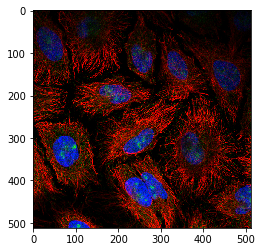

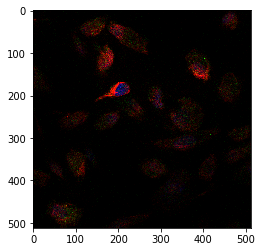

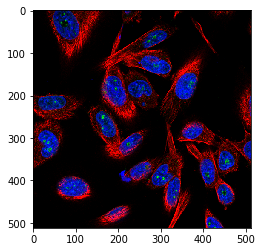

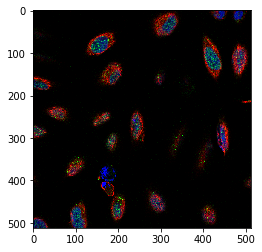

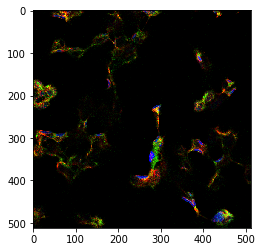

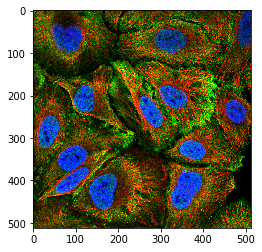

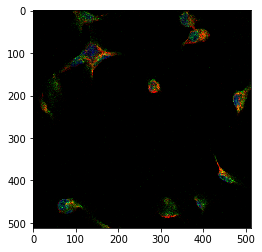

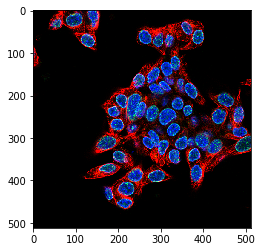

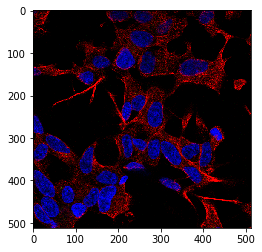

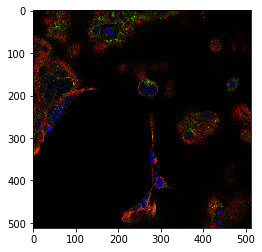

In [23]:
offset = 10600
length = 10
DIR_out = "/kaggle_data/human_protein/test_png4_scale/"
for i in range(offset,offset+length):
    im = cv2.imread(DIR_out + imgList['Id'][i] +'.png', cv2.IMREAD_UNCHANGED)
    plt.imshow(im[:,:,:3])
    plt.show()

In [ ]:
b